In [1]:
import os

import time
import matplotlib.pyplot as plt
import torch
from torch.nn import BCEWithLogitsLoss
from torch.optim import adam
from torch.utils.data import DataLoader
from torchvision import transforms

from src.datasets import SatelliteImagesTrainDataset, train_test_split
from src.nets import UNet
from src.path import DATA_TRAIN_PATH, MODELS_DIR, extract_archives
from src.plot_utils import plot_image_mask

from src.unet import UNet

In [2]:
NUM_CHANNELS = 3
IMG_WIDTH = 400
IMG_HEIGHT = 400
BATCH_SIZE = 1
NUM_EPOCHS = 10
MODEL_PATH = os.path.join(MODELS_DIR, 'Unet_model.pth')

In [3]:
image_transform = transforms.Compose([
        transforms.ToPILImage(),
        #transforms.Resize((IMG_WIDTH, IMG_HEIGHT)),
        transforms.ToTensor(),
        #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
mask_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((IMG_WIDTH, IMG_HEIGHT)),
        transforms.ToTensor()
    ])


In [4]:
dataset = SatelliteImagesTrainDataset(
        root_dir=DATA_TRAIN_PATH,
        image_transform=image_transform,
        mask_transform=mask_transform,
    )

In [5]:
image, mask = dataset[0]
print('Image size:', image.shape)
print('Mask size:', mask.shape)
#plot_image_mask(image.numpy(), mask.numpy())

# Split train test
SPLIT = 0.2
trainset, testset = train_test_split(dataset, SPLIT)
print('Train size:', len(trainset))
print('Test size:', len(testset))

# Define loaders
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

Image size: torch.Size([3, 400, 400])
Mask size: torch.Size([1, 400, 400])
Train size: 80
Test size: 20


In [12]:
# Define a loss function and optimizer
NB_IMAGE = 100;
unet = UNet(retain_dim = True)

lossFunc = BCEWithLogitsLoss()
optimizer = torch.optim.Adam(unet.parameters(), lr=0.001)

H = {"train_loss": [], "test_loss": []}

print("[INFO] training the network...")
startTime = time.time()
for e in range(NUM_EPOCHS):  # loop over the dataset multiple times
    print(f"Iteration {e} ")
    totalTrainLoss = 0
    totalTestLoss = 0

    print("Start train set")
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # forward
        pred = unet(inputs)
        loss = lossFunc(pred, labels)

        #backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        totalTrainLoss += loss

    with torch.no_grad():
        unet.eval()
		# loop over the validation set
        print("Start test set")
        for (x, y) in testloader:
           
			# make the predictions and calculate the validation losspred = unet(x)
            pred = unet(x)
            totalTestLoss += lossFunc(pred, y)
    # calculate the average training and validation loss
    avgTrainLoss=totalTrainLoss/(NB_IMAGE*(1-SPLIT))
    avgTestLoss=totalTestLoss/(NB_IMAGE*SPLIT)
    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    H["test_loss"].append(avgTestLoss.cpu().detach().numpy())
	# print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, NUM_EPOCHS))
    print("Train loss: {:.6f}, Test loss: {:.4f}".format(avgTrainLoss, 
                                                         avgTestLoss))

# display the total time needed to perform the training
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))

torch.save(unet.state_dict(), MODEL_PATH)


[INFO] training the network...
Iteration 0 
Start train set
Start test set
[INFO] EPOCH: 1/10
Train loss: 0.699251, Test loss: 0.6931
Iteration 1 
Start train set
Start test set
[INFO] EPOCH: 2/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 2 
Start train set
Start test set
[INFO] EPOCH: 3/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 3 
Start train set
Start test set
[INFO] EPOCH: 4/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 4 
Start train set
Start test set
[INFO] EPOCH: 5/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 5 
Start train set
Start test set
[INFO] EPOCH: 6/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 6 
Start train set
Start test set
[INFO] EPOCH: 7/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 7 
Start train set
Start test set
[INFO] EPOCH: 8/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 8 
Start train set
Start test set
[INFO] EPOCH: 9/10
Train loss: 0.693147, Test loss: 0.6931
Iteration 9 
Start train set
Start test se

PermissionError: [Errno 13] Permission denied: 'D:\\Emilien\\Documents\\Cours\\ML_course-master\\ML-project2\\ml-project-2-qelbis'

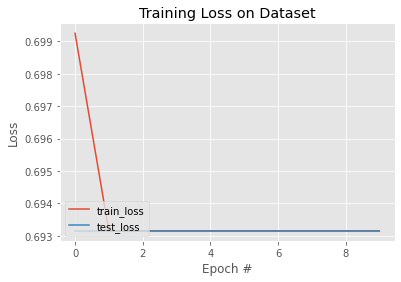

In [18]:
 # plot the training loss
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["test_loss"], label="test_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
torch.save(unet, "D:\\Emilien\\Documents\\Cours\\ML_course-master\\ML-project2\\ml-project-2-qelbis")